# Assignment Week 1

###  Importing of the Python libraries and packages

In [58]:
# Import all the necessary packages.
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



### Importing of the  dataset 

In [59]:
# Read the provided CSV file/data set.
reviews = pd.read_csv('turtle_reviews.csv') 


reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


### Sense-check the DataFrame by printing the DataFrame, data types and metadata.


In [60]:
#Looking at the metadata (df.info()),

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [61]:
# Using isnull() function to determine if there are any missing values
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [62]:
# Descriptive statistics

reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [63]:
#Change column headings to names that are easier to reference (e.g. renumeration and spending_score).

reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)
   
# After renaming the columns
print(reviews.columns)


Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'language', 'platform', 'product', 'review', 'summary'],
      dtype='object')


In [64]:
#Export the new dataframe in Jupiter Notebook

reviews.to_csv('turtle_reviews_new.csv', encoding='utf-8')



In [65]:
#Export the new dataframe in the desktop

reviews.to_csv(r'C:\Users\laura\OneDrive\Desktop\turtle_reviews_new.csv')


In [66]:
#import the dataframe in the notebook and sense check shape/metadata

new_reviews = pd.read_csv('turtle_reviews_new.csv') 

new_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   language        2000 non-null   object 
 8   platform        2000 non-null   object 
 9   product         2000 non-null   int64  
 10  review          2000 non-null   object 
 11  summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 187.6+ KB


###  Linear Regression on the "age" variable 

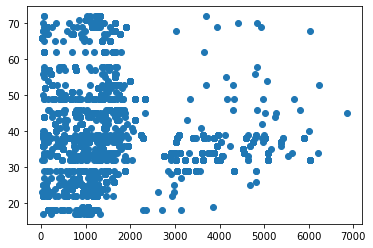

In [67]:
# Dependent variable.
y = reviews['age'] 

# Independent variable.
X = reviews['loyalty_points']

# Checking linearity
plt.scatter(X,y)

### OLS Regression model 

In [68]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [69]:
f = 'y ~ X'
test = ols(f, data = reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 14 Sep 2022   Prob (F-statistic):             0.0577
Time:                        19:42:35   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
X             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Creating the Linear Equation 

In [70]:
# x coef: 
# constant coef: 
y_pred =  - -0.0004 * X + 40.2035

y_pred


0       40.2875
1       40.4131
2       40.2195
3       40.4283
4       40.3499
         ...   
1995    41.8159
1996    40.4191
1997    42.4491
1998    40.6227
1999    40.3951
Name: loyalty_points, Length: 2000, dtype: float64

### Plotting the Regression Line 

Text(0, 0.5, 'Age')

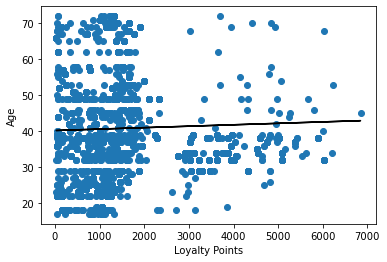

In [71]:
# Plot the data points.
plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Loyalty Points")
plt.ylabel("Age")

### Linear Regression on the "remuneration" variable

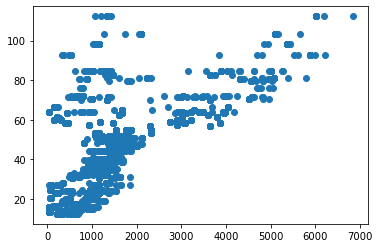

In [72]:
# Dependent variable.
y = reviews['remuneration'] 

# Independent variable.
X = reviews['loyalty_points']

# Checking linearity
plt.scatter(X,y)

### OLS Regression Model 

In [73]:
f = 'y ~ X'
test = ols(f, data = reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        19:42:46   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
X              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Creating Linear Equation

In [74]:
# x coef: 0.0111
#Intercept:30.5606

y_pred = 0.0111 * X + 40.2035

y_pred

0        42.5345
1        46.0199
2        40.6475
3        46.4417
4        44.2661
          ...   
1995     84.9476
1996     46.1864
1997    102.5189
1998     51.8363
1999     45.5204
Name: loyalty_points, Length: 2000, dtype: float64

### Plotting the Linear Regression Line 

Text(0, 0.5, 'Remuneration')

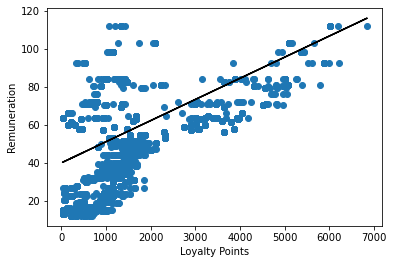

In [75]:
#Plot the data points.
plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Loyalty Points")
plt.ylabel("Remuneration")
